In [1]:
# Clone the entire repo.
"""!git clone -l -s git://github.com/darkshadow013/Land-cover-ML akshay-poria
%cd akshay-poria
!ls"""

'!git clone -l -s git://github.com/darkshadow013/Land-cover-ML akshay-poria\n%cd akshay-poria\n!ls'

In [1]:
import scipy.io as si         # for inputing matlab files
import numpy as np            # Linear Algebra tools
from random import shuffle    # for shuffling dataset
import pandas as pd           # for csv files and dataframes
import matplotlib.pyplot as plt  # for ploting graphs and curves

In [2]:
"""x_csv = pd.read_csv('/content/drive/My Drive/Machine Learning Projects/Hyperspectral and Multispectral/Hyperspectral_Image_Classification_Project/Mahesh_Sir_Data/data/data.csv')         
y_csv = pd.read_csv('/content/drive/My Drive/Machine Learning Projects/Hyperspectral and Multispectral/Hyperspectral_Image_Classification_Project/Mahesh_Sir_Data/data/ref.csv')"""

mat_x = si.loadmat('E:/GITHUB/Akshay poriya/Data/Indian_pines_corrected.mat')['indian_pines_corrected']        # shape 145*145*220
mat_y = si.loadmat('E:/GITHUB/Akshay poriya/Data/Indian_pines_gt.mat')['indian_pines_gt']        

In [5]:
h, w, b = 145, 145, 200             # height,width and band of image
P_S = 3                          # patch size (window size)
oversampling = True              # Turn true to make distribution of samples across various classes to be uniform
no_of_patch = 200                # if oversampling is true enter no of patches for each class

In [6]:
x_np, y_np = np.array(mat_x), np.array(mat_y)
x, y = x_np.reshape(h,w,b), y_np.reshape(h,w)

In [7]:
x = x.astype('float')
for i in range(b):
  x[:,:,i] /= np.max(x[:,:,i])

In [8]:
pad_width = int( (P_S-1)/2 )
padded_x = np.pad(x,[(pad_width,pad_width),(pad_width,pad_width),(0,0)],'edge')

In [9]:
X,Y = [],[]
for i in range(h):
  for j in range(w):
    if(y[i][j]!= 0):
      patch = padded_x[i:i+P_S,j:j+P_S,:]
      X.append(patch)
      Y.append(y[i][j]-1)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.25,stratify=Y, random_state=10)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]), array([  35, 1071,  622,  178,  362,  547,   21,  358,   15,  729, 1841,
        445,  154,  949,  289,   70], dtype=int64))


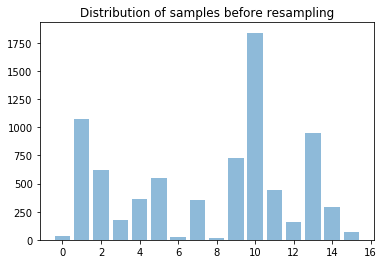

In [11]:
u_c = np.unique(y_train,return_counts=True)
print(u_c)
plt.bar( u_c[0],u_c[1], align='center', alpha=0.5)
plt.title('Distribution of samples before resampling')
plt.show()

In [12]:
output_classes = len(np.unique(y_np))-1
if(oversampling):
  classes = []
  for i in range(output_classes):
    classes.append([])
  for i in range(len(y_train)):
    classes[y_train[i]].append(x_train[i])
  for c in range(output_classes):
    temp = classes[c]
    for i in range( int( no_of_patch / len(classes[c]) ) ):
      classes[c]+=temp
    shuffle(classes[c])
    classes[c] = classes[c][0:no_of_patch]
  x_train,y_train = [],[]
  for c in range(output_classes):
    x_train.extend( classes[c] )
    for i in range(len(classes[c])):
      y_train.append(c)
  randomize = np.arange(len(x_train))
  np.random.shuffle(randomize)
  x_train = [x_train[i] for i in randomize]
  y_train = [y_train[i] for i in randomize]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]), array([200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
       200, 200, 200], dtype=int64))


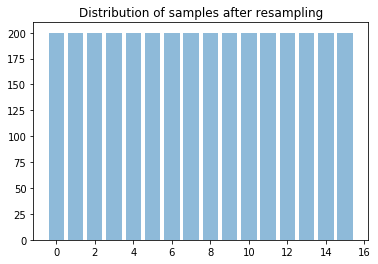

In [13]:
u_c = np.unique(y_train,return_counts=True)
print(u_c)
plt.bar( u_c[0],u_c[1], align='center', alpha=0.5)
plt.title('Distribution of samples after resampling')
plt.show()

In [14]:
x_train,x_test,y_train,y_test = np.array(x_train),np.array(x_test),np.array(y_train),np.array(y_test)

In [15]:
print(keras.__version__)

NameError: name 'keras' is not defined

In [16]:
import tensorflow as tf
import datetime, os
import keras
from keras import datasets, layers, models
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
np.random.seed(1337)          # to get reproducible results

Using TensorFlow backend.


In [17]:
# Number of neurons in each hidden layer
BAND = b
BATCH_SIZE = 100
LEARNING_RATE = 0.01
CONV_1_CHANNELS = 500
CONV_2_CHANNELS = 100
FC_1_UNITS = 200
FC_2_UNITS = 84
FC_3_UNITS = 7

#Kernel Sizes
CONV_K_S = 5
POOL_K_S = 2

STRIDES = 2

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(filters = CONV_1_CHANNELS, kernel_size = CONV_K_S , activation='relu', input_shape=(P_S, P_S, BAND), strides = STRIDES, padding = 'same'))
model.add(layers.MaxPooling2D(pool_size = POOL_K_S, padding = 'same', strides = STRIDES))
model.add(layers.Conv2D(filters = CONV_2_CHANNELS, kernel_size = CONV_K_S , activation='relu',strides = STRIDES, padding = 'same'))
model.add(layers.MaxPooling2D(pool_size = POOL_K_S, padding = 'same', strides = STRIDES))
model.add(layers.Flatten())
model.add(layers.Dense(FC_1_UNITS, activation='relu'))
model.add(layers.Dense(FC_2_UNITS, activation='relu'))
model.add(layers.Dense(FC_3_UNITS, activation='softmax'))

In [19]:
model.compile(optimizer=keras.optimizers.Adagrad(LEARNING_RATE),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 2, 2, 500)         2500500   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 500)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 100)         1250100   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 100)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_2 (Dense)              (None, 84)                16884     
__________

In [21]:
# To save Best Model
import os
filepath= "LeNet_ps3.hdf5"
file_dir = os.path.dirname(filepath)
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='max')
callbacks_list = [checkpoint]

In [22]:
history = model.fit(x = x_train, y = y_train, validation_data = (x_test,y_test), validation_freq = 1, batch_size = 128,callbacks=callbacks_list, shuffle = False, epochs=2)

TypeError: Unrecognized keyword arguments: {'validation_freq': 1}

In [ ]:
model1 = load_model(filepath)

In [ ]:
test_loss, test_acc = model1.evaluate(x_test, y_test)
print(test_acc)

In [ ]:
#Confusion matrix creation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
y_pred = model1.predict(x_test)
y_pred1 = np.zeros((y_pred.shape[0],1))

for i in range(y_pred.shape[0]):
  y_pred1[i] = np.argmax(y_pred[i])

y_pred = y_pred1

In [ ]:
results = confusion_matrix(y_test,y_pred)
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test, y_pred)) 
print ('Report : ')
print (classification_report(y_test, y_pred))

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(acc, label='Training Accuracy')
#plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training Accuracy')

plt.subplot(2, 2, 2)
#plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Validation Accuracy')

plt.subplot(2, 2, 3)
plt.plot(loss, label='Training Loss')
#plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training Loss')
plt.xlabel('epoch')

plt.subplot(2, 2, 4)
#plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Validation Loss')
plt.xlabel('epoch')

plt.show()

In [ ]:
# Function to extract patche at h_index,w_index 

def patch_at_index(h_index,w_index):
  patch = padded_x[h_index:h_index+P_S,w_index:w_index+P_S,:]
  patch = patch.reshape(P_S,P_S,b)
  return patch

In [ ]:
y_hat = np.zeros((h,w),dtype=int)

for i in range(h):
  for j in range(w):
    if(i%2==0 and j==0):
      print(i)
    patch = patch_at_index(i,j)
    patch = np.array([patch])
    y_hat[i][j] = np.argmax( model1.predict(patch) )+1

In [ ]:
pip install spectral

In [ ]:
import spectral
spectral.imshow(classes = y,figsize=(10,10))
spectral.imshow(classes = y_hat,figsize=(10,10))